# Brownstone Falls Unconformity structural analysis

In [1]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplstereonet  # in PATH?
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

ModuleNotFoundError: No module named 'mplstereonet'

In [2]:
def calc_pole_mean(dataframe):
    poles = ipmag.make_di_block(dataframe['pole_trend'],dataframe['pole_plunge'])
    poles_mean = pmag.fisher_mean(poles)
    return poles_mean

## Kallander Creek Volcanics

In [3]:
# import structural measurements
CF_planes = pd.read_csv('./Kall_planes.csv')
# ALL_planes['strat'] = pd.Series(index=ALL_planes.index, name='strat')
# print CF_planes.unitId.unique()
CF_planes_Kall = CF_planes.ix[CF_planes.rockUnit.str.contains('Kallander')]
CF_planes_Kall = CF_planes_Kall.append(CF_planes.ix[CF_planes.rockUnit.str.contains('Inter flow sediments')])
CF_planes_Kall.reset_index(inplace=True, drop=True)

In [4]:
for i in range(len(CF_planes_Kall)):
    if CF_planes_Kall['dec_corrected'][i]=='no':
        CF_planes_Kall['strike_corr'][i] = (CF_planes_Kall['strike'][i] + CF_planes_Kall['declination'][i])%360
        CF_planes_Kall['dipAzimuth_corr'][i] = (CF_planes_Kall['dipAzimuth'][i] + CF_planes_Kall['declination'][i])%360
    else:
        CF_planes_Kall['strike_corr'][i] = CF_planes_Kall['strike'][i]
        CF_planes_Kall['dipAzimuth_corr'][i] = CF_planes_Kall['dipAzimuth'][i]

In [5]:
CF_planes_Kall['pole_trend'] = pd.Series((CF_planes_Kall['dipAzimuth_corr']+180)%360, index=CF_planes_Kall.index)
CF_planes_Kall['pole_plunge'] = pd.Series(90-CF_planes_Kall['dip'], index=CF_planes_Kall.index)

In [6]:
CF_planes_Kall.head()

,localityName,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,planeType,...,declination,rockUnit,timedate,notes,dec_corrected,strike_corr,dipAzimuth_corr,measurer,pole_trend,pole_plunge
0,Locality 1,681962.9437,5138138.323,46.372338,-90.634088,15T,4.0,5.0,-1.0,Flow banding,...,-2.121697,Kallander Creek basalts,Wed Aug 3 11:05:07 2016,,yes,253.857178,343.857178,LF,163.857178,36.555855
1,Locality 1,681963.8088,5138139.817,46.372351,-90.634076,15T,4.0,5.0,-1.0,Flow banding,...,-2.121697,Kallander Creek basalts,Wed Aug 3 11:05:02 2016,,yes,261.773682,351.773682,LF,171.773682,35.621937
2,Locality 1,681963.8810,5138141.930,46.372370,-90.634074,15T,4.0,5.0,-1.0,Flow banding,...,-2.121697,Kallander Creek basalts,Wed Aug 3 11:04:54 2016,,yes,248.471375,338.471375,LF,158.471375,31.992512
3,Locality 1,681962.4972,5138142.681,46.372378,-90.634092,15T,3.0,5.0,-1.0,Flow banding,...,-2.121697,Kallander Creek basalts,Wed Aug 3 11:04:46 2016,,yes,225.460663,315.460663,LF,135.460663,34.446072
4,Locality 1,681962.4972,5138142.681,46.372378,-90.634092,15T,3.0,5.0,-1.0,Flow banding,...,-2.121697,Kallander Creek basalts,Wed Aug 3 11:04:40 2016,,yes,265.160614,355.160614,LF,175.160614,30.403049


In [7]:
# discard three outliers
CF_planes_Kall.drop(CF_planes_Kall.loc[CF_planes_Kall.pole_trend>200].index, inplace=True)
CF_planes_Kall.reset_index(inplace=True, drop=True)

In [8]:
CF_Kall_mean = calc_pole_mean(CF_planes_Kall)
CF_Kall_mean

{'dec': 150.63991617789188,
 'inc': 28.893558521081133,
 'n': 84,
 'r': 80.97427632395619,
 'k': 27.43145405416665,
 'alpha95': 3.0031114036085031,
 'csd': 15.465380319149771}

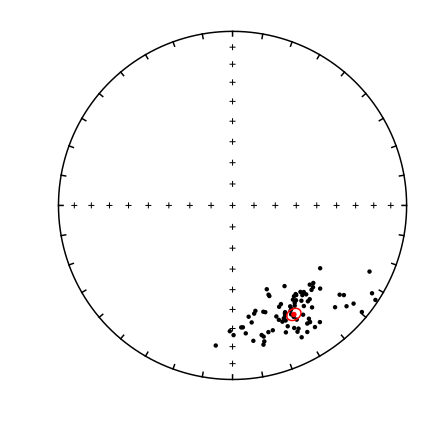

In [9]:
plt.figure(figsize=(6,6), num=1)
ipmag.plot_net(1)
# dec, inc = ipmag.make_di_block(ALL_planes['pole_trend'],ALL_planes['pole_plunge'])
# ipmag.plot_di(dec, inc)
ipmag.plot_di(CF_planes_Kall['pole_trend'].tolist(),CF_planes_Kall['pole_plunge'].tolist())
ipmag.plot_di_mean(CF_Kall_mean['dec'], CF_Kall_mean['inc'], 
                   CF_Kall_mean['alpha95'], color='r')
plt.show()

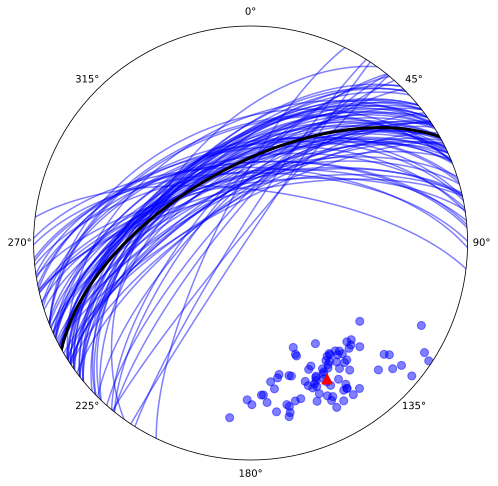

mean strike:  240.639916178
mean dip:  61.1064414789


In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ALL_mean_strike = (CF_Kall_mean['dec'] + 90.0)%360
ALL_mean_dip = 90.0 - CF_Kall_mean['inc']

for n in range(len(CF_planes_Kall)):
    ax.plane(CF_planes_Kall['strike'][n],CF_planes_Kall['dip'][n], c='b', 
            linewidth=1.5, alpha=0.5)
    ax.pole(CF_planes_Kall['strike'][n],CF_planes_Kall['dip'][n], c='b',
            markersize=8, alpha=0.5)
ax.plane(ALL_mean_strike,ALL_mean_dip, 'k-', linewidth=3)
ax.pole(ALL_mean_strike,ALL_mean_dip, 'r^', markersize=10)
plt.savefig('Kall_orientations.png')
plt.show()
print("mean strike: ", ALL_mean_strike)
print("mean dip: ", ALL_mean_dip)

## Oronto Group (above unconformity)

In [11]:
# read in 2016 structural measurements
Oronto_planes_2016 = CF_planes.loc[(CF_planes['latitude']<46.378) & (CF_planes.planeType==' Bedding')]
Oronto_planes_2016 = Oronto_planes_2016.loc[(Oronto_planes_2016.rockUnit.str.contains('Freda')) | 
                                            (Oronto_planes_2016.rockUnit.str.contains('Nonesuch')) | 
                                            (Oronto_planes_2016.rockUnit.str.contains('Copper Harbor')) | 
                                            (Oronto_planes_2016.rockUnit.str.contains('Siltstone above'))]
Oronto_planes_2016.reset_index(inplace=True, drop=True)

In [12]:
for i in range(len(Oronto_planes_2016)):
    if Oronto_planes_2016['dec_corrected'][i]=='no':
        Oronto_planes_2016['strike_corr'][i] = (Oronto_planes_2016['strike'][i] + Oronto_planes_2016['declination'][i])%360
        Oronto_planes_2016['dipAzimuth_corr'][i] = (Oronto_planes_2016['dipAzimuth'][i] + Oronto_planes_2016['declination'][i])%360
    else:
        Oronto_planes_2016['strike_corr'][i] = Oronto_planes_2016['strike'][i]
        Oronto_planes_2016['dipAzimuth_corr'][i] = Oronto_planes_2016['dipAzimuth'][i]

Oronto_planes_2016['pole_trend'] = pd.Series((Oronto_planes_2016['dipAzimuth_corr']+180)%360, index=Oronto_planes_2016.index)
Oronto_planes_2016['pole_plunge'] = pd.Series(90-Oronto_planes_2016['dip'], index=Oronto_planes_2016.index)

In [13]:
# import 2018 structural measurements
Oronto_planes = pd.read_csv('./Oronto_planes.csv')
Oronto_planes = Oronto_planes.ix[Oronto_planes.latitude<46.378]  # should filter everything but Copper Falls
Oronto_planes = Oronto_planes.ix[Oronto_planes.planeType==' Bedding']
Oronto_planes = Oronto_planes.ix[(Oronto_planes.rockUnit.str.contains('Nonesuch')) | 
                                 (Oronto_planes.rockUnit.str.contains('Freda')) | 
                                 (Oronto_planes.rockUnit.str.contains('Copper Harbor'))]
Oronto_planes.reset_index(inplace=True, drop=True)

In [14]:
for i in range(len(Oronto_planes)):
    if Oronto_planes['dec_corrected'][i]=='no':
        Oronto_planes['strike_corr'][i] = (Oronto_planes['strike'][i] + Oronto_planes['declination'][i])%360
        Oronto_planes['dipAzimuth_corr'][i] = (Oronto_planes['dipAzimuth'][i] + Oronto_planes['declination'][i])%360
    else:
        Oronto_planes['strike_corr'][i] = Oronto_planes['strike'][i]
        Oronto_planes['dipAzimuth_corr'][i] = Oronto_planes['dipAzimuth'][i]

In [15]:
Oronto_planes['pole_trend'] = pd.Series((Oronto_planes['dipAzimuth_corr']+180)%360, index=Oronto_planes.index)
Oronto_planes['pole_plunge'] = pd.Series(90-Oronto_planes['dip'], index=Oronto_planes.index)

In [16]:
# combine 2016 and 2018 measurements
Oronto_all_planes = Oronto_planes.append(Oronto_planes_2016,ignore_index=True)

In [17]:
# discard three outliers
Oronto_all_planes.drop(Oronto_all_planes.loc[Oronto_all_planes.pole_trend>180].index, inplace=True)
Oronto_all_planes.reset_index(inplace=True, drop=True)

In [18]:
Oronto_mean = calc_pole_mean(Oronto_all_planes)
Oronto_mean

{'dec': 113.87473244540017,
 'inc': 7.5224353086087392,
 'n': 38,
 'r': 37.283128383716488,
 'k': 51.613146844646486,
 'alpha95': 3.2633341253720634,
 'csd': 11.274696225830661}

In [19]:
Oronto_all_planes.tail()

,altitude,dataId,dec_corrected,declination,dip,dipAzimuth,dipAzimuth_corr,horiz_precision,latitude,localityId,...,pole_plunge,pole_trend,rockUnit,strike,strike_corr,timedate,vert_precision,x,y,zone
33,8.0,NaN,yes,-2.024261,89.000000,321.890961,321.890961,10.0,46.375738,NaN,...,1.000000,141.890961,Copper Harbor Conglomerate,231.890961,231.890961,Sat Aug 6 08:21:44 2016,-1.0,681631.7846,5138506.500,15T
34,8.0,NaN,yes,-2.024261,81.314377,300.277039,300.277039,5.0,46.375836,NaN,...,8.685623,120.277039,Copper Harbor Conglomerate,210.277039,210.277039,Sat Aug 6 07:44:16 2016,-1.0,681583.3349,5138515.922,15T
35,0.0,NaN,yes,-2.123596,77.718552,304.887238,304.887238,-1.0,46.375332,NaN,...,12.281448,124.887238,Freda,214.887238,214.887238,Thu Aug 4 14:44:34 2016,-1.0,681765.7191,5138465.366,15T
36,0.0,NaN,yes,-2.123596,78.624886,296.624542,296.624542,-1.0,46.375332,NaN,...,11.375114,116.624542,Freda,206.624542,206.624542,Thu Aug 4 14:44:16 2016,-1.0,681765.7191,5138465.366,15T
37,0.0,NaN,yes,-2.123596,69.721466,290.152100,290.152100,-1.0,46.375332,NaN,...,20.278534,110.152100,Freda,200.152100,200.152100,Thu Aug 4 14:43:58 2016,-1.0,681765.7191,5138465.366,15T


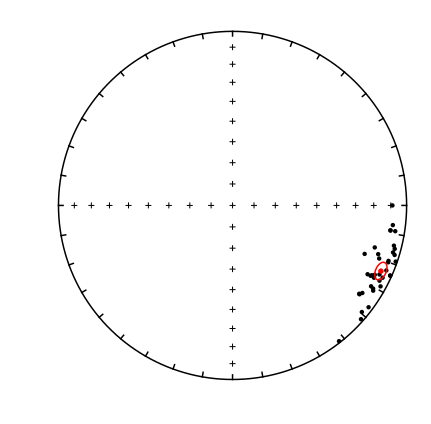

In [20]:
plt.figure(figsize=(6,6), num=1)
ipmag.plot_net(1)
ipmag.plot_di(Oronto_all_planes['pole_trend'].tolist(),Oronto_all_planes['pole_plunge'].tolist())
ipmag.plot_di_mean(Oronto_mean['dec'], Oronto_mean['inc'], 
                   Oronto_mean['alpha95'], color='r')
plt.show()

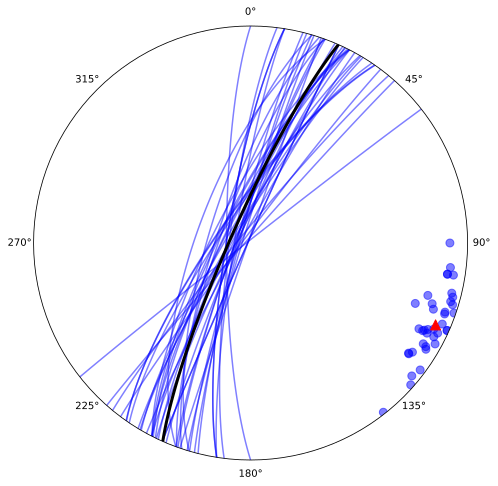

mean strike:  203.874732445
mean dip:  82.4775646914


In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ALL_mean_strike = (Oronto_mean['dec'] + 90.0)%360
ALL_mean_dip = 90.0 - Oronto_mean['inc']

for n in range(len(Oronto_all_planes)):
    ax.plane(Oronto_all_planes['strike'][n],Oronto_all_planes['dip'][n], c='b', 
            linewidth=1.5, alpha=0.5)
    ax.pole(Oronto_all_planes['strike'][n],Oronto_all_planes['dip'][n], c='b',
            markersize=8, alpha=0.5)
ax.plane(ALL_mean_strike,ALL_mean_dip, 'k-', linewidth=3)
ax.pole(ALL_mean_strike,ALL_mean_dip, 'r^', markersize=10)
plt.savefig('Oronto_orientations.png')
plt.show()
print("mean strike: ", ALL_mean_strike)
print("mean dip: ", ALL_mean_dip)

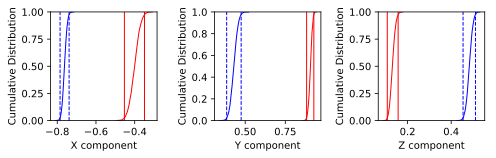

Results of Watson V test: 

Watson's V:           513.7
Critical value of V:  6.2
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 40.7
Critical angle for M&M1990:   4.4



(0, 40.659643136794415, 4.4266521148413567)

In [22]:
ipmag.common_mean_bootstrap(ipmag.make_di_block(Oronto_all_planes['pole_trend'].tolist(),
                                                Oronto_all_planes['pole_plunge'].tolist()), 
                            ipmag.make_di_block(CF_planes_Kall['pole_trend'].tolist(),
                                                CF_planes_Kall['pole_plunge'].tolist()))
ipmag.common_mean_watson(ipmag.make_di_block(Oronto_all_planes['pole_trend'].tolist(),
                                             Oronto_all_planes['pole_plunge'].tolist()), 
                         ipmag.make_di_block(CF_planes_Kall['pole_trend'].tolist(),
                                             CF_planes_Kall['pole_plunge'].tolist()))

## Multi-axis tilt

Calculate the angular difference between the Oronto Group and Kallander Creek volcanics (CF sequence) in order to apply a two-step tilt correction to CF data.

In [28]:
# apply tilt correction of overlying Oronto Group to the pole of Kallander Creek tilt plane
tilt_primary = pmag.dotilt(CF_Kall_mean['dec'], CF_Kall_mean['inc'], (Oronto_mean['dec'] + 180.0)%360, 90.0 - Oronto_mean['inc'])

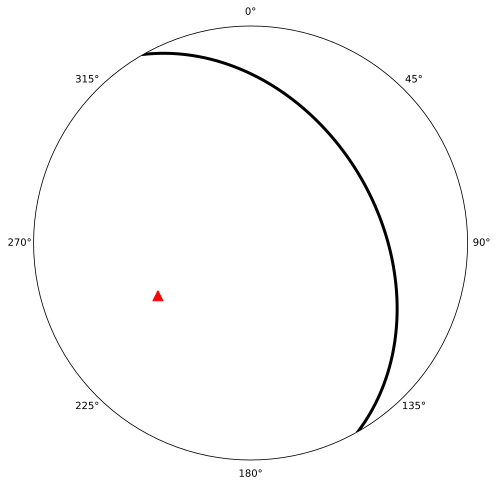

mean strike:  330.335394583 	mean dip direction:  60.3353945831
mean dip:  40.6596431368


In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

tilt_primary_strike = (tilt_primary[0] + 90.0)%360
tilt_primary_dip = 90.0 - tilt_primary[1]

ax.plane(tilt_primary_strike,tilt_primary_dip, 'k-', linewidth=3)
ax.pole(tilt_primary_strike,tilt_primary_dip, 'r^', markersize=10)
plt.show()
print("mean strike: ", tilt_primary_strike, "\tmean dip direction: ", (tilt_primary_strike+90.0)%360)
print("mean dip: ", tilt_primary_dip)